In [1]:
# 掲載しない
import sys
sys.path.append('./notears')

# notearsの読み込み（環境に応じて変更してください）
from notears import linear
from notears import nonlinear
from notears import utils

# その他必要なライブラリの読み込み
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DAGs with NO TEARS: Continuous optimization for structure learning

In [2]:
# データ生成用の乱数設定
utils.set_random_seed(123)

# データ生成
n, d, s0, graph_type, sem_type = 200, 10, 20, 'ER', 'gauss'  # 順にサンプル数、特徴量数、有向辺数、グラフタイプ、SEMタイプ
B_true = utils.simulate_dag(d, s0, graph_type)  # 真のDAG（バイナリ行列）を生成
W_true = utils.simulate_parameter(B_true)  # 線形SEMの各係数を生成
X = utils.simulate_linear_sem(W_true, n, sem_type)  # トイデータを生成

In [3]:
# 推定
W_pred = linear.notears_linear(X, lambda1=0.1, loss_type='l2')  # データから線形SEMの各係数を推定
assert utils.is_dag(W_pred)  # DAGかどうかの確認
B_pred = W_pred != 0  # 今回はゼロ非ゼロに基づいてDAG（バイナリ行列）を予測

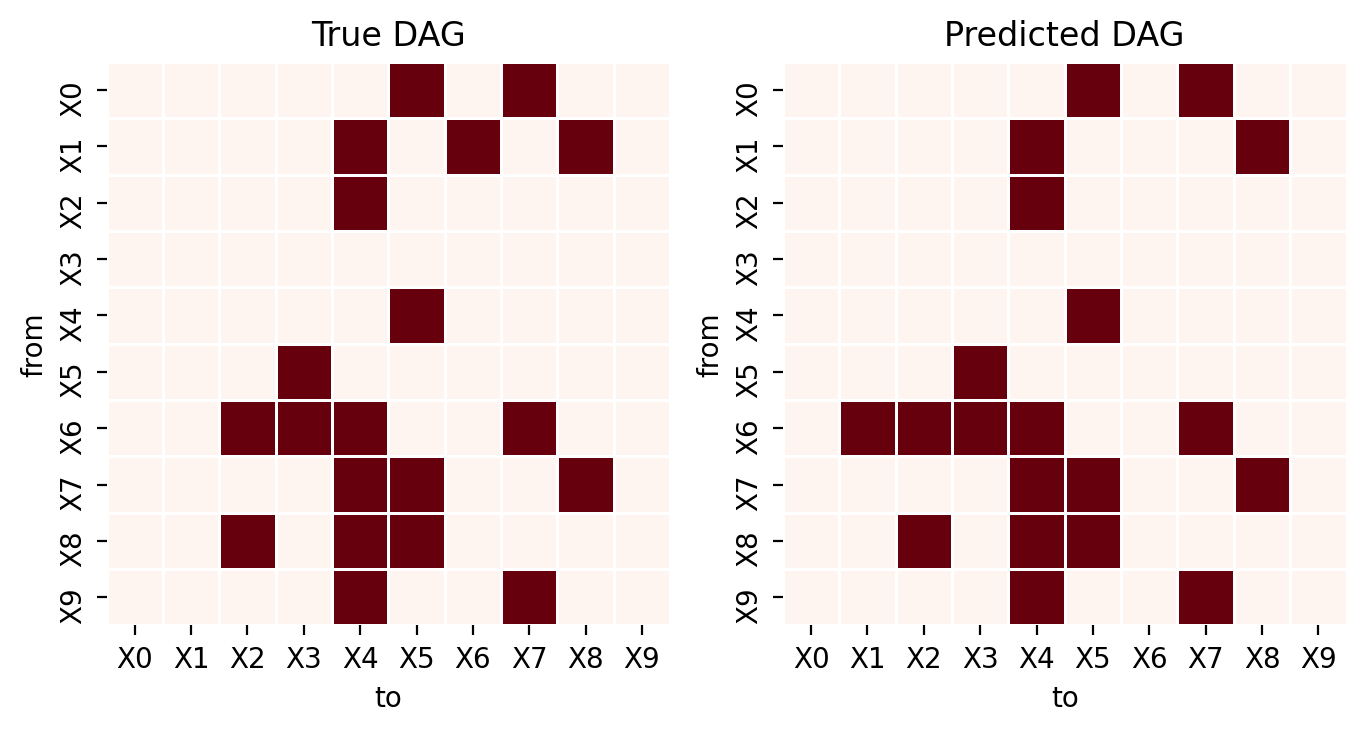

In [4]:
# 可視化
plt.figure(figsize=[8,4], dpi=200)

# 真のDAG（バイナリ行列）をプロット
plt.subplot(1,2,1)
sns.heatmap(B_true, cmap='Reds', cbar=False, square=True, linewidths=1)
plt.xticks(np.arange(d)+0.5, [f'X{i}' for i in range(d)])
plt.yticks(np.arange(d)+0.5, [f'X{i}' for i in range(d)])
plt.xlabel('to')
plt.ylabel('from')
plt.title('True DAG')

# 推定されたDAG（バイナリ行列）をプロット
plt.subplot(1,2,2)
sns.heatmap(B_pred, cmap='Reds', cbar=False, square=True, linewidths=1)
plt.xticks(np.arange(d)+0.5, [f'X{i}' for i in range(d)])
plt.yticks(np.arange(d)+0.5, [f'X{i}' for i in range(d)])
plt.xlabel('to')
plt.ylabel('from')
plt.title('Predicted DAG')

plt.show()

## Learning sparse nonparametric DAGs

In [5]:
# PyTorchの設定
torch.set_default_dtype(torch.double)

In [6]:
# データ生成用の乱数設定
utils.set_random_seed(456)

# データ生成
n, d, s0, graph_type, sem_type = 200, 10, 20, 'ER', 'mim'  # 順にサンプル数、特徴量数、有向辺数、グラフタイプ、SEMタイプ
B_true = utils.simulate_dag(d, s0, graph_type)  # 真のDAG（バイナリ行列）を生成
X = utils.simulate_nonlinear_sem(B_true, n, sem_type)  # トイデータを生成

In [7]:
# 推定
model = nonlinear.NotearsMLP(dims=[d, 20, 1], bias=True)  # 非線形SEMを近似するMLPを定義
W_pred = nonlinear.notears_nonlinear(model, X, lambda1=0.02, lambda2=0.01)  # データからMLPに基づく依存関係を推定
assert utils.is_dag(W_pred)  # DAGかどうかの確認
B_pred = W_pred != 0  # 今回はゼロ非ゼロに基づいてDAG（バイナリ行列）を予測

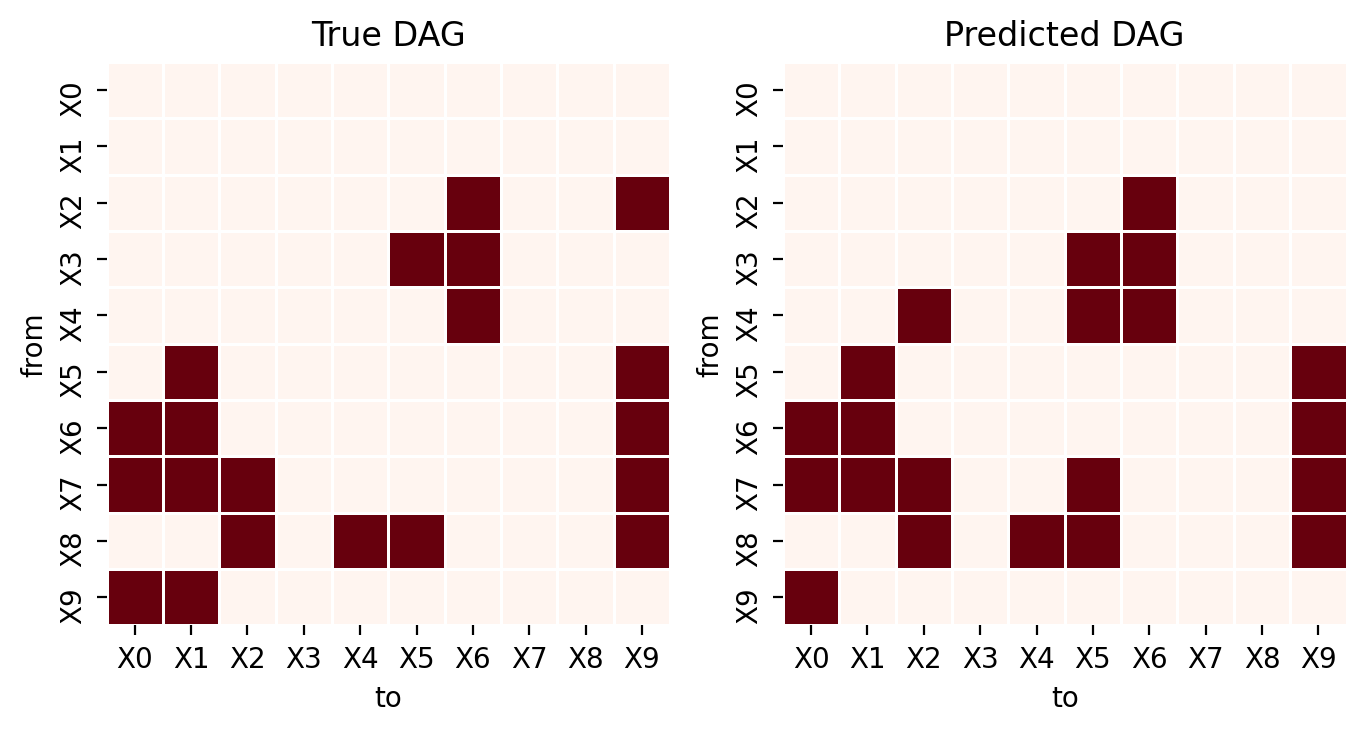

In [8]:
# 可視化
plt.figure(figsize=[8,4], dpi=200)

# 真のDAG（バイナリ行列）をプロット
plt.subplot(1,2,1)
sns.heatmap(B_true, cmap='Reds', cbar=False, square=True, linewidths=1)
plt.xticks(np.arange(d)+0.5, [f'X{i}' for i in range(d)])
plt.yticks(np.arange(d)+0.5, [f'X{i}' for i in range(d)])
plt.xlabel('to')
plt.ylabel('from')
plt.title('True DAG')

# 推定されたDAG（バイナリ行列）をプロット
plt.subplot(1,2,2)
sns.heatmap(B_pred, cmap='Reds', cbar=False, square=True, linewidths=1)
plt.xticks(np.arange(d)+0.5, [f'X{i}' for i in range(d)])
plt.yticks(np.arange(d)+0.5, [f'X{i}' for i in range(d)])
plt.xlabel('to')
plt.ylabel('from')
plt.title('Predicted DAG')

plt.show()